## Experiments - neural networks in breast cancer classification problem

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Deep learning
import torch
import torch.nn as nn
import torch.optim as optim

#### Methods for visualizing confusion matrix and classification report

In [3]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap='Blues', figsize=(10, 6), axis=None):
    """
    Plot the confusion matrix.
    """
    if axis is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = axis
        
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap=cmap, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    
    if axis is None:
        plt.show()  
    
# Plot classification report
def plot_classification_report(report, title='Classification report', axis=None):
    """
    Plot the classification report.
    """
    if axis is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    else:
        ax = axis
        
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
    
    ax.set_title('Classification report')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Classes')
    
    if axis is None:
        plt.show()

#### Load data

In [8]:
# Load data
data = pd.read_csv('datasets/data.csv')

# Delete unnecessary columns
data.drop(['id'], axis=1, inplace=True)

In [76]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0     0.521037      0.022658        0.545989   0.363733   
1          1.0     0.643144      0.272574        0.615783   0.501591   
2          1.0     0.601496      0.390260        0.595743   0.449417   
3          1.0     0.210090      0.360839        0.233501   0.102906   
4          1.0     0.629893      0.156578        0.630986   0.489290   
..         ...          ...           ...             ...        ...   
564        1.0     0.690000      0.428813        0.678668   0.566490   
565        1.0     0.622320      0.626987        0.604036   0.474019   
566        1.0     0.455251      0.621238        0.445788   0.303118   
567        1.0     0.644564      0.663510        0.665538   0.475716   
568        0.0     0.036869      0.501522        0.028540   0.015907   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.593753          0.792037        0.703140             0.731113   
1           0.289880          0.181768        0.203608             0.348757   
2           0.514309          0.431017        0.462512             0.635686   
3           0.811321          0.811361        0.565604             0.522863   
4           0.430351          0.347893        0.463918             0.518390   
..               ...               ...             ...                  ...   
564         0.526948          0.296055        0.571462             0.690358   
565         0.407782          0.257714        0.337395             0.486630   
566         0.288165          0.254340        0.216753             0.263519   
567         0.588336          0.790197        0.823336             0.755467   
568         0.000000          0.074351        0.000000             0.000000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.686364  ...      0.620776       0.141525         0.668310   
1         0.379798  ...      0.606901       0.303571         0.539818   
2         0.509596  ...      0.556386       0.360075         0.508442   
3         0.776263  ...      0.248310       0.385928         0.241347   
4         0.378283  ...      0.519744       0.123934         0.506948   
..             ...  ...           ...            ...              ...   
564       0.336364  ...      0.623266       0.383262         0.576174   
565       0.349495  ...      0.560655       0.699094         0.520892   
566       0.267677  ...      0.393099       0.589019         0.379949   
567       0.675253  ...      0.633582       0.730277         0.668310   
568       0.266162  ...      0.054287       0.489072         0.043578   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      0.450698          0.601136           0.619292         0.568610   
1      0.435214          0.347553           0.154563         0.192971   
2      0.374508          0.483590           0.385375         0.359744   
3      0.094008          0.915472           0.814012         0.548642   
4      0.341575          0.437364           0.172415         0.319489   
..          ...               ...                ...              ...   
564    0.452664          0.461137           0.178527         0.328035   
565    0.379915          0.300007           0.159997         0.256789   
566    0.230731          0.282177           0.273705         0.271805   
567    0.402035          0.619626           0.815758         0.749760   
568    0.020497          0.124084           0.036043         0.000000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.912027        0.598462                 0.418864  
1                0.639175        0.233590                 0.222878  
2                0.835052        0.403706                 0.213433  
3                0.884880        1.000000                 0.773711  
4                0.558419        0.157500                 0.142595  
..                    .

#### Data preprocessing

In [20]:
# Split data into training and testing sets
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# Transfer data to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#### Neural network architectures

In [28]:
# V1
# Three fully connected layers with ReLU activation function
# Output layer with Sigmoid activation function
class NeuralNetworkV1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetworkV1, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [29]:
# V2
# Four fully connected layers with ReLU activation function and dropout layers
# Output layer with Sigmoid activation function
class NeuralNetworkV2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetworkV2, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc4 = nn.Linear(hidden_size // 4, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [30]:
# V3
# Four fully connected layers with Leaky ReLU activation function
# Output layer with Sigmoid activation function
class NeuralNetworkV3(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetworkV3, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc4 = nn.Linear(hidden_size // 4, 1)

        self.leaky_relu = nn.LeakyReLU(0.1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.leaky_relu(out)
        out = self.fc2(out)
        out = self.leaky_relu(out)
        out = self.fc3(out)
        out = self.leaky_relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [59]:
# V4
# Two convolutional layers with ReLU activation function and max pooling layers
# Two fully connected layers with ReLU activation function
# Output layer with Sigmoid activation function
class NeuralNetworkV4(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetworkV4, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        
        # Calculate the output size after the conv and pooling layers
        conv_output_size = input_size // 2  # After two pooling layers with stride 2
        conv_output_size = conv_output_size // 2  # After the second pooling layer
        
        self.fc1 = nn.Linear(32 * conv_output_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)
        out = out.view(out.size(0), -1)  # Flatten the tensor
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [60]:
# V5
# LSTM layer with ReLU activation function
# Two fully connected layers with ReLU activation function
# Output layer with Sigmoid activation function
class NeuralNetworkV5(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetworkV5, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the last output of the LSTM
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

#### Training and evaluation

In [61]:
# Training function
def train(model, X_train, y_train, criterion, optimizer, epochs=100):
    """
    Train the neural network.
    """
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

In [62]:
# Evaluation function
def evaluate(model, X_test, y_test):
    """
    Evaluate the neural network.
    """
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = (y_pred > 0.5).float()
        cm = confusion_matrix(y_test.cpu(), y_pred.cpu())
        cr = classification_report(y_test.cpu(), y_pred.cpu(), target_names=['Benign', 'Malignant'], output_dict=True)
        acc = accuracy_score(y_test.cpu(), y_pred.cpu())
        
        return cm, cr, acc

In [63]:
# Neural network parameters
input_size = X_train.shape[1]
hidden_size = 128
learning_rate = 0.001
weight_decay = 0.0001
epochs = 1000

#### Neural network V1

In [45]:
# Neural network V1
model_v1 = NeuralNetworkV1(input_size, hidden_size).to(device)
criterion_v1 = nn.BCELoss()
optimizer_v1 = optim.Adam(model_v1.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
train(model_v1, X_train, y_train, criterion_v1, optimizer_v1, epochs)

# Evaluate the model
cm_v1, cr_v1, acc_v1 = evaluate(model_v1, X_test, y_test)

Epoch 10/1000, Loss: 0.4779872000217438
Epoch 20/1000, Loss: 0.27251550555229187
Epoch 30/1000, Loss: 0.15164388716220856
Epoch 40/1000, Loss: 0.10145729035139084
Epoch 50/1000, Loss: 0.07789547741413116
Epoch 60/1000, Loss: 0.06484830379486084
Epoch 70/1000, Loss: 0.05551866441965103
Epoch 80/1000, Loss: 0.04840008169412613
Epoch 90/1000, Loss: 0.042578838765621185
Epoch 100/1000, Loss: 0.03765585273504257
Epoch 110/1000, Loss: 0.03336893767118454
Epoch 120/1000, Loss: 0.02957029454410076
Epoch 130/1000, Loss: 0.02613999880850315
Epoch 140/1000, Loss: 0.023030269891023636
Epoch 150/1000, Loss: 0.02021847851574421
Epoch 160/1000, Loss: 0.01771070621907711
Epoch 170/1000, Loss: 0.015495861880481243
Epoch 180/1000, Loss: 0.013572530820965767
Epoch 190/1000, Loss: 0.011898759752511978
Epoch 200/1000, Loss: 0.010441687889397144
Epoch 210/1000, Loss: 0.009163236245512962
Epoch 220/1000, Loss: 0.00809294544160366
Epoch 230/1000, Loss: 0.007174020167440176
Epoch 240/1000, Loss: 0.006399359088

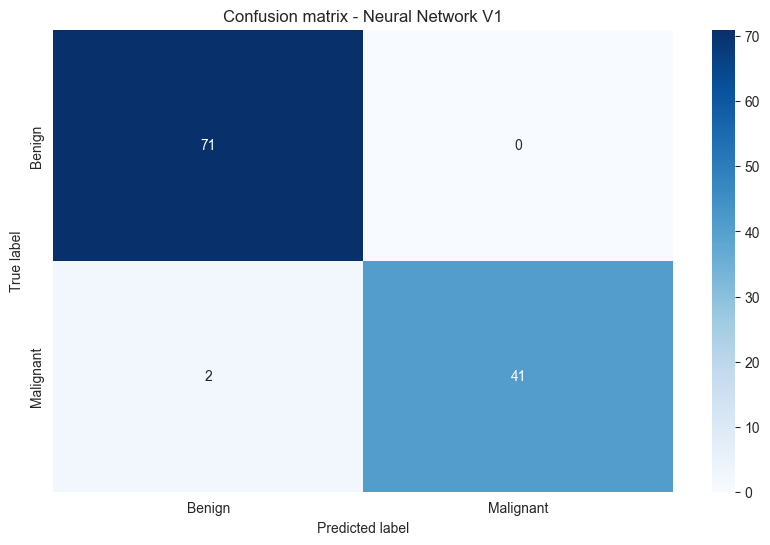

In [46]:
# Plot confusion matrix
plot_confusion_matrix(cm_v1, ['Benign', 'Malignant'], title='Confusion matrix - Neural Network V1')

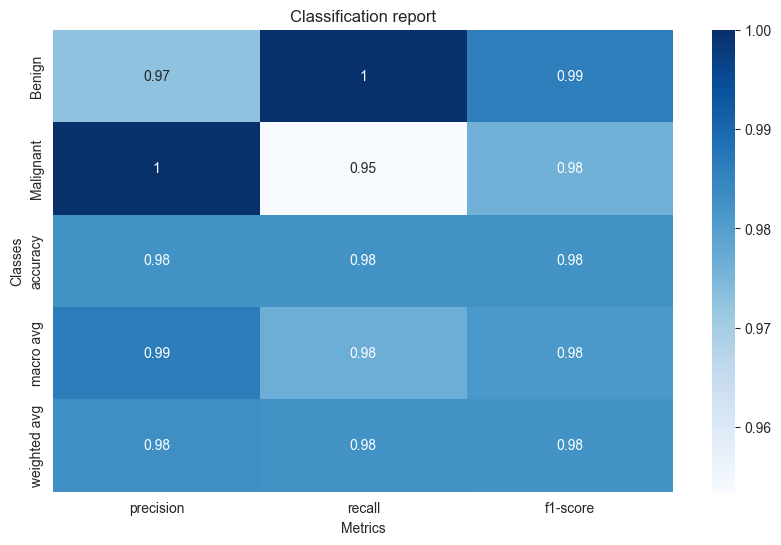

In [47]:
# Plot classification report
plot_classification_report(cr_v1)

#### Neural network V2

In [48]:
# Neural network V2
model_v2 = NeuralNetworkV2(input_size, hidden_size).to(device)
criterion_v2 = nn.BCELoss()
optimizer_v2 = optim.Adam(model_v2.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
train(model_v2, X_train, y_train, criterion_v2, optimizer_v2, epochs)

# Evaluate the model
cm_v2, cr_v2, acc_v2 = evaluate(model_v2, X_test, y_test)

Epoch 10/1000, Loss: 0.6100791096687317
Epoch 20/1000, Loss: 0.40138334035873413
Epoch 30/1000, Loss: 0.2066049426794052
Epoch 40/1000, Loss: 0.1198694109916687
Epoch 50/1000, Loss: 0.10492949932813644
Epoch 60/1000, Loss: 0.08525355905294418
Epoch 70/1000, Loss: 0.07265784591436386
Epoch 80/1000, Loss: 0.07437089085578918
Epoch 90/1000, Loss: 0.04634793847799301
Epoch 100/1000, Loss: 0.04539191350340843
Epoch 110/1000, Loss: 0.03791217878460884
Epoch 120/1000, Loss: 0.056155040860176086
Epoch 130/1000, Loss: 0.02974613755941391
Epoch 140/1000, Loss: 0.028519876301288605
Epoch 150/1000, Loss: 0.02841273508965969
Epoch 160/1000, Loss: 0.02827402390539646
Epoch 170/1000, Loss: 0.03137960284948349
Epoch 180/1000, Loss: 0.021595297381281853
Epoch 190/1000, Loss: 0.03367958217859268
Epoch 200/1000, Loss: 0.03138892352581024
Epoch 210/1000, Loss: 0.024735331535339355
Epoch 220/1000, Loss: 0.013547890819609165
Epoch 230/1000, Loss: 0.016778510063886642
Epoch 240/1000, Loss: 0.0136621138080954

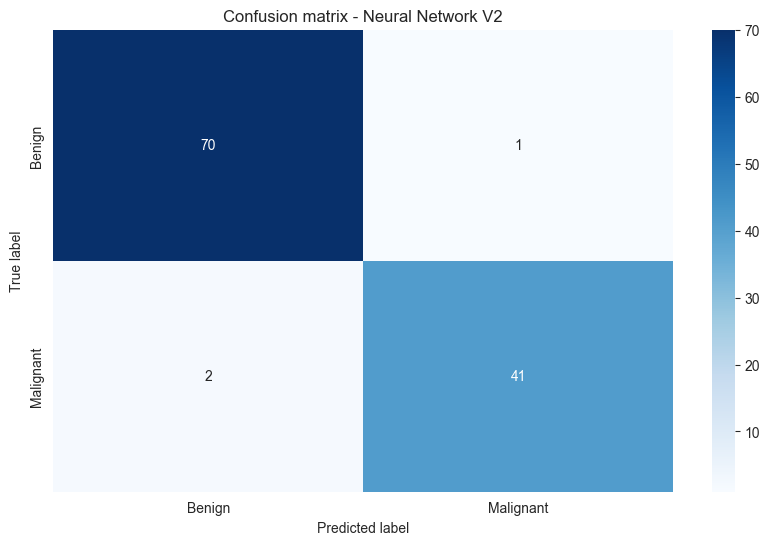

In [49]:
# Plot confusion matrix
plot_confusion_matrix(cm_v2, ['Benign', 'Malignant'], title='Confusion matrix - Neural Network V2')

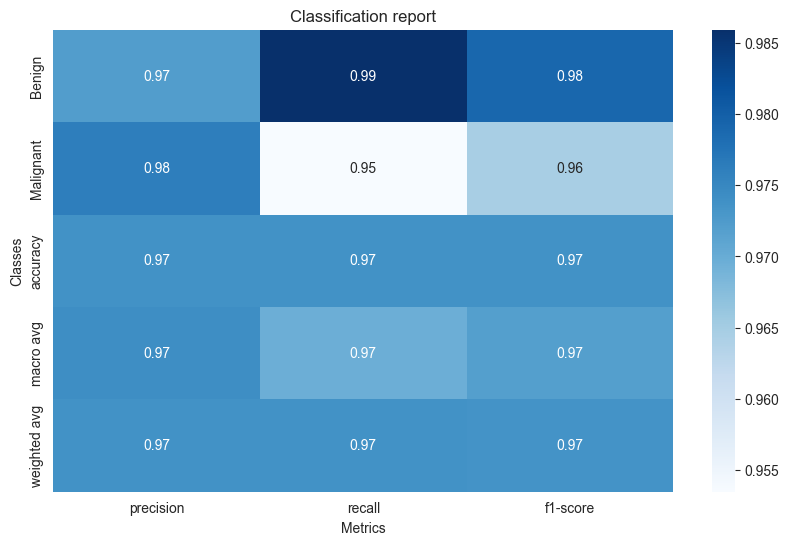

In [50]:
# Plot classification report
plot_classification_report(cr_v2)

#### Neural network V3

In [51]:
# Neural network V3
model_v3 = NeuralNetworkV3(input_size, hidden_size).to(device)
criterion_v3 = nn.BCELoss()
optimizer_v3 = optim.Adam(model_v3.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
train(model_v3, X_train, y_train, criterion_v3, optimizer_v3, epochs)

# Evaluate the model
cm_v3, cr_v3, acc_v3 = evaluate(model_v3, X_test, y_test)

Epoch 10/1000, Loss: 0.5781828761100769
Epoch 20/1000, Loss: 0.35954442620277405
Epoch 30/1000, Loss: 0.16433778405189514
Epoch 40/1000, Loss: 0.09435044229030609
Epoch 50/1000, Loss: 0.06897494941949844
Epoch 60/1000, Loss: 0.05602168291807175
Epoch 70/1000, Loss: 0.046810463070869446
Epoch 80/1000, Loss: 0.03961234167218208
Epoch 90/1000, Loss: 0.033818356692790985
Epoch 100/1000, Loss: 0.02865622565150261
Epoch 110/1000, Loss: 0.023877572268247604
Epoch 120/1000, Loss: 0.019604215398430824
Epoch 130/1000, Loss: 0.01610736735165119
Epoch 140/1000, Loss: 0.01334200520068407
Epoch 150/1000, Loss: 0.011029877699911594
Epoch 160/1000, Loss: 0.009049472399055958
Epoch 170/1000, Loss: 0.007442420814186335
Epoch 180/1000, Loss: 0.0061035449616611
Epoch 190/1000, Loss: 0.004539611749351025
Epoch 200/1000, Loss: 0.0030651914421468973
Epoch 210/1000, Loss: 0.0022714021615684032
Epoch 220/1000, Loss: 0.001738564227707684
Epoch 230/1000, Loss: 0.0013824186753481627
Epoch 240/1000, Loss: 0.001137

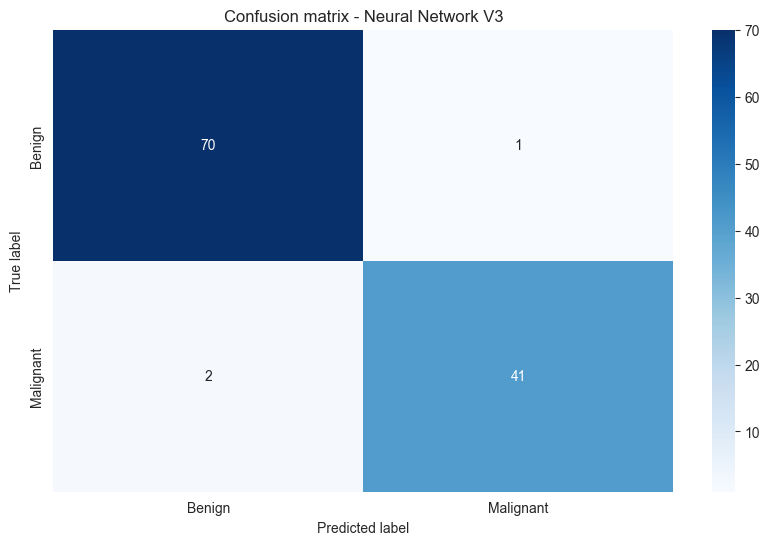

In [53]:
# Plot confusion matrix
plot_confusion_matrix(cm_v3, ['Benign', 'Malignant'], title='Confusion matrix - Neural Network V3')

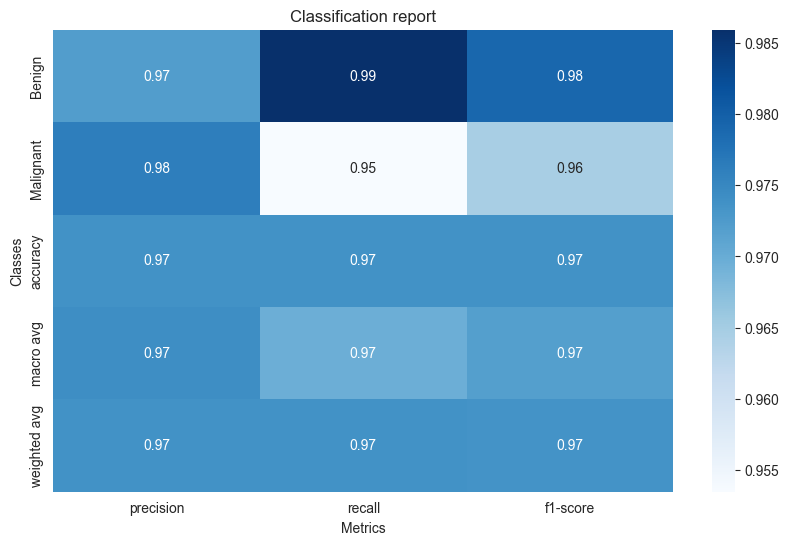

In [54]:
# Plot classification report
plot_classification_report(cr_v3)

#### Neural network V4

In [64]:
# Neural network V4
model_v4 = NeuralNetworkV4(input_size, hidden_size).to(device)
criterion_v4 = nn.BCELoss()
optimizer_v4 = optim.Adam(model_v4.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
train(model_v4, X_train, y_train, criterion_v4, optimizer_v4, epochs)

# Evaluate the model
cm_v4, cr_v4, acc_v4 = evaluate(model_v4, X_test, y_test)

Epoch 10/1000, Loss: 0.4186047613620758
Epoch 20/1000, Loss: 0.20972707867622375
Epoch 30/1000, Loss: 0.14643631875514984
Epoch 40/1000, Loss: 0.1106308326125145
Epoch 50/1000, Loss: 0.09039844572544098
Epoch 60/1000, Loss: 0.07973706722259521
Epoch 70/1000, Loss: 0.07261230796575546
Epoch 80/1000, Loss: 0.06730187684297562
Epoch 90/1000, Loss: 0.06239919736981392
Epoch 100/1000, Loss: 0.05727291852235794
Epoch 110/1000, Loss: 0.05158916860818863
Epoch 120/1000, Loss: 0.04558803513646126
Epoch 130/1000, Loss: 0.03927084803581238
Epoch 140/1000, Loss: 0.03285034000873566
Epoch 150/1000, Loss: 0.026732975617051125
Epoch 160/1000, Loss: 0.021154126152396202
Epoch 170/1000, Loss: 0.016432005912065506
Epoch 180/1000, Loss: 0.012630755081772804
Epoch 190/1000, Loss: 0.009745683521032333
Epoch 200/1000, Loss: 0.007611896842718124
Epoch 210/1000, Loss: 0.0060510095208883286
Epoch 220/1000, Loss: 0.004891632590442896
Epoch 230/1000, Loss: 0.004030665848404169
Epoch 240/1000, Loss: 0.00337952445

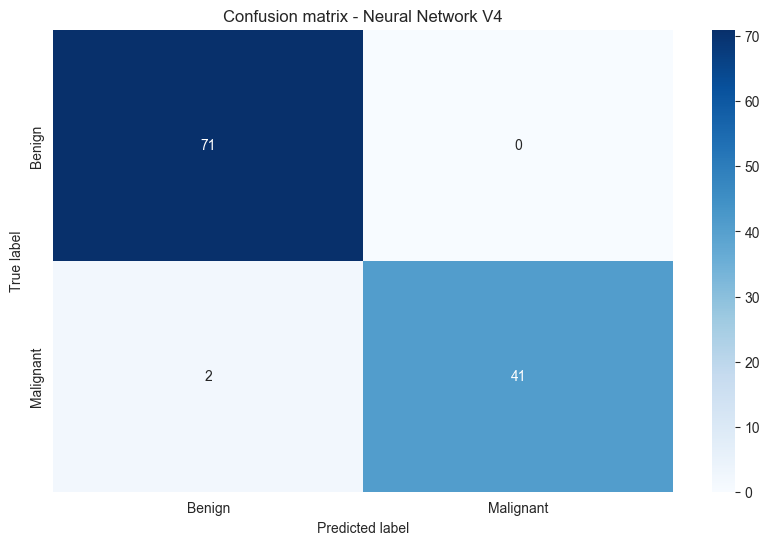

In [65]:
# Plot confusion matrix
plot_confusion_matrix(cm_v4, ['Benign', 'Malignant'], title='Confusion matrix - Neural Network V4')

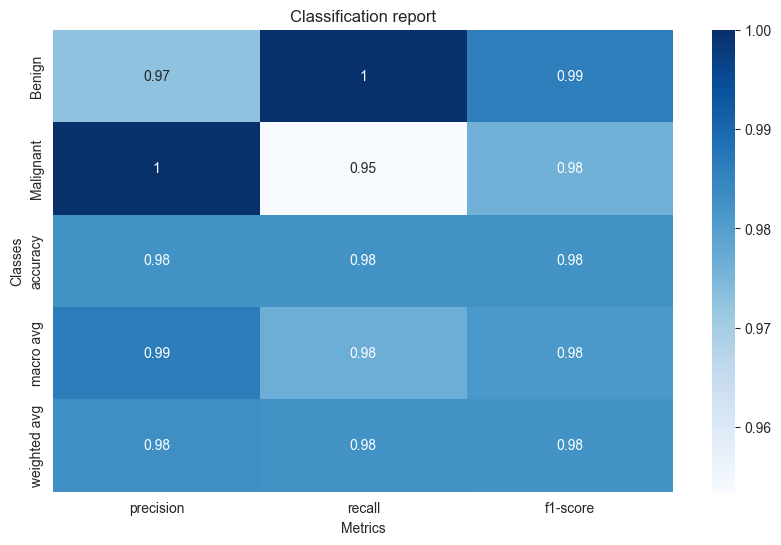

In [66]:
# Plot classification report
plot_classification_report(cr_v4)

#### Neural network V5

In [67]:
# Neural network V5
model_v5 = NeuralNetworkV5(input_size, hidden_size).to(device)
criterion_v5 = nn.BCELoss()
optimizer_v5 = optim.Adam(model_v5.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
train(model_v5, X_train.unsqueeze(1), y_train, criterion_v5, optimizer_v5, epochs)

# Evaluate the model
cm_v5, cr_v5, acc_v5 = evaluate(model_v5, X_test.unsqueeze(1), y_test)

Epoch 10/1000, Loss: 0.6472257971763611
Epoch 20/1000, Loss: 0.5392731428146362
Epoch 30/1000, Loss: 0.36916524171829224
Epoch 40/1000, Loss: 0.21396635472774506
Epoch 50/1000, Loss: 0.13106301426887512
Epoch 60/1000, Loss: 0.09312008321285248
Epoch 70/1000, Loss: 0.07527194172143936
Epoch 80/1000, Loss: 0.06560871005058289
Epoch 90/1000, Loss: 0.05922595039010048
Epoch 100/1000, Loss: 0.054361775517463684
Epoch 110/1000, Loss: 0.050068166106939316
Epoch 120/1000, Loss: 0.04590252414345741
Epoch 130/1000, Loss: 0.042265865951776505
Epoch 140/1000, Loss: 0.03903531655669212
Epoch 150/1000, Loss: 0.03611545264720917
Epoch 160/1000, Loss: 0.03336109220981598
Epoch 170/1000, Loss: 0.030720891430974007
Epoch 180/1000, Loss: 0.028099115937948227
Epoch 190/1000, Loss: 0.02529078908264637
Epoch 200/1000, Loss: 0.022276364266872406
Epoch 210/1000, Loss: 0.01945570483803749
Epoch 220/1000, Loss: 0.016959620639681816
Epoch 230/1000, Loss: 0.014633278362452984
Epoch 240/1000, Loss: 0.0124338706955

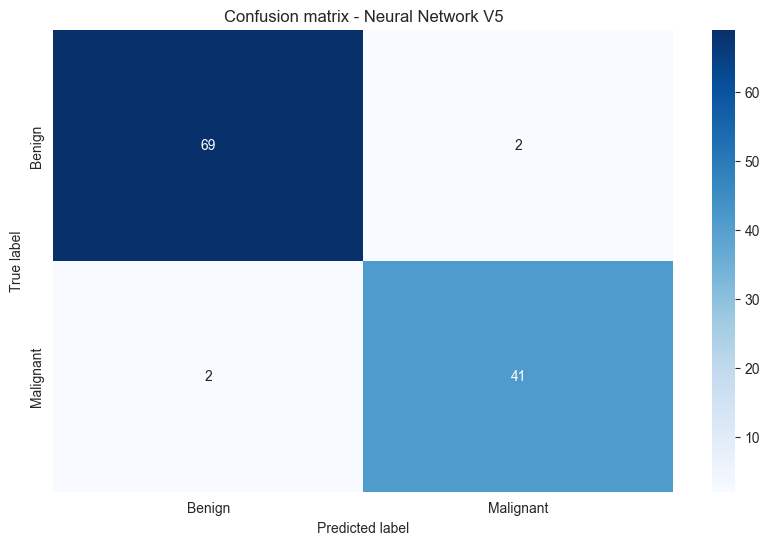

In [68]:
# Plot confusion matrix
plot_confusion_matrix(cm_v5, ['Benign', 'Malignant'], title='Confusion matrix - Neural Network V5')

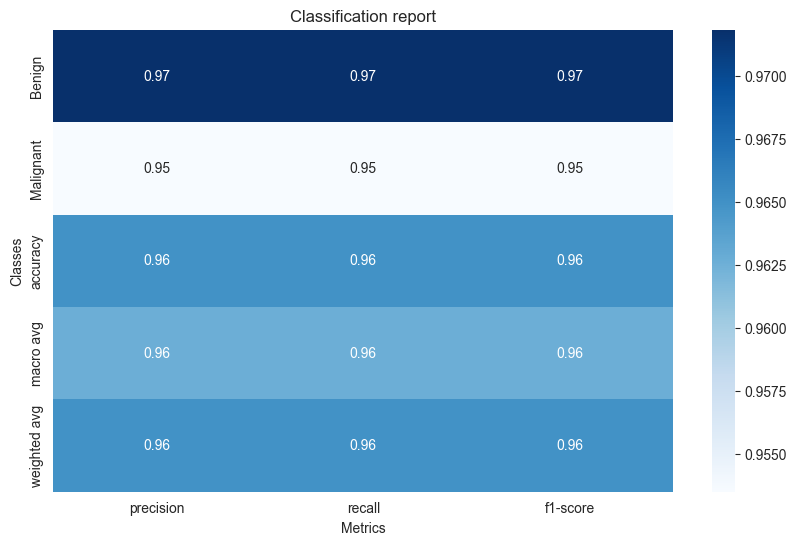

In [69]:
# Plot classification report
plot_classification_report(cr_v5)

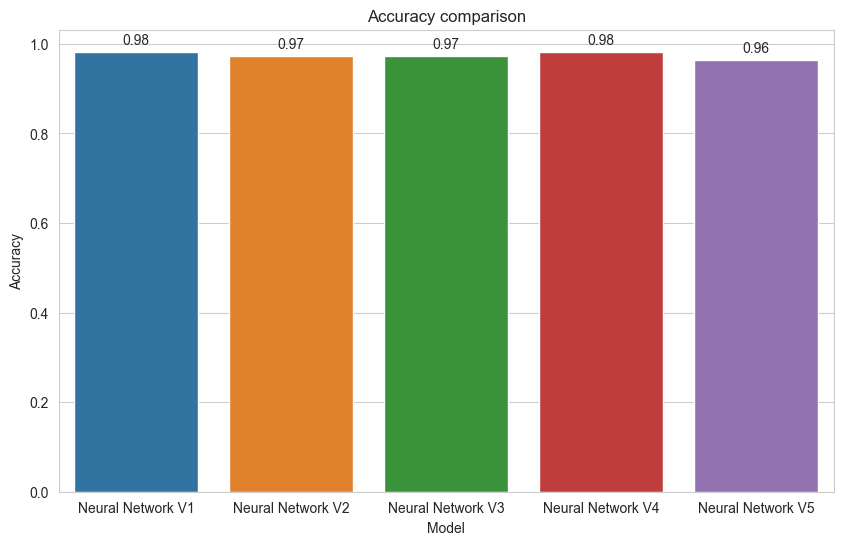

In [90]:
# Accuracy comparison
accuracies = [acc_v1, acc_v2, acc_v3, acc_v4, acc_v5]
models = ['Neural Network V1', 'Neural Network V2', 'Neural Network V3', 'Neural Network V4', 'Neural Network V5']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, ax=ax)

# Add labels
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

ax.set_title('Accuracy comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.show()

In [89]:
acc_v4

0.9824561403508771